In [2]:
import torch
import numpy as np

In [3]:
torch_array = torch.tensor([0, 1, 2, 3])

In [4]:
torch_array

tensor([0, 1, 2, 3])

In [5]:
np_array = np.array([0, 1, 2, 3])

In [6]:
torch_array = torch.from_numpy(np_array)
torch_array

tensor([0, 1, 2, 3])

In [7]:
torch2np_array = torch_array.numpy()
torch2np_array

array([0, 1, 2, 3])

In [8]:
torch.arange(10)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
torch_array = torch.linspace(0, 1, 6)
torch_array

tensor([0.0000, 0.2000, 0.4000, 0.6000, 0.8000, 1.0000])

In [10]:
torch.ones((3, 3))

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [11]:
torch_array = torch.randn(4)
torch_array

tensor([ 1.2501e+00,  3.4736e-01,  2.2086e+00, -1.7621e-03])

In [12]:
torch_array = torch.arange(10)
print(torch_array)
torch_array = torch_array.view(5, 2)
print(torch_array)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])


In [13]:
print(torch_array)
print(torch_array.transpose(0, 1))

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])
tensor([[0, 2, 4, 6, 8],
        [1, 3, 5, 7, 9]])


In [14]:
torch_array[2]

tensor([4, 5])

In [15]:
torch_array[2:5]

tensor([[4, 5],
        [6, 7],
        [8, 9]])

In [16]:
x = torch.arange(4)
print(torch.add(x, 4))

tensor([4, 5, 6, 7])


In [17]:
#ベクトルの内積
x1 = torch.arange(4)
x2 = torch.arange(4)
print(torch.matmul(x1, x2))
print(torch.dot(x1, x2))

tensor(14)
tensor(14)


In [18]:
X1 = torch.arange(24).view(-1, 2, 4)
X2 = torch.arange(24).view(-1, 4, 2)
print(X1.size())
print(X2.size())
print(torch.matmul(X1, X2))
print(torch.bmm(X1, X2))

torch.Size([3, 2, 4])
torch.Size([3, 4, 2])
tensor([[[  28,   34],
         [  76,   98]],

        [[ 428,  466],
         [ 604,  658]],

        [[1340, 1410],
         [1644, 1730]]])
tensor([[[  28,   34],
         [  76,   98]],

        [[ 428,  466],
         [ 604,  658]],

        [[1340, 1410],
         [1644, 1730]]])


In [19]:
torch_array.type()

'torch.LongTensor'

In [20]:
torch_array.shape

torch.Size([5, 2])

# Sequentialを使った書き方

In [21]:
import torch.nn as nn
model = nn.Sequential(
            nn.Conv2d(1, 20, 5),
            nn.ReLU(),
            nn.Conv2d(20, 64, 5),
            nn.ReLU()
            )
model

Sequential(
  (0): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
  (3): ReLU()
)

In [22]:
model = torch.nn.Sequential()
model.add_module("conv1", nn.Conv2d(1, 20, 5))
model.add_module("relu1", nn.ReLU())
model.add_module("conv2", nn.Conv2d(20, 64, 5))
model.add_module("relu2", nn.ReLU())
model

Sequential(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (conv2): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
)

In [23]:
from collections import OrderedDict

In [24]:
model = nn.Sequential(OrderedDict([
    ("conv1", nn.Conv2d(1, 20, 5)),
    ("relu1", nn.ReLU()),
    ("conv2", nn.Conv2d(20, 64, 5)),
    ("relu2", nn.ReLU())
]))
model

Sequential(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (conv2): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
)

# nn.Moduleを継承した書き方

In [25]:
import torch.nn.functional as F

In [27]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__() #nn.Moduleを継承
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 64, 5)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        return F.relu(self.conv2(x))

    
model = Model()

In [28]:
model

Model(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
)

# nn.ModuleListを使った書き方

In [29]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.convs = nn.ModuleList([nn.Conv2d(1, 20, 5), nn.Conv2d(20, 64, 5)])
    
    def forward(self, x):
        for i, l in enumerate(self.convs):
            x = l(x)
        return x
    
model = Model()
model

Model(
  (convs): ModuleList(
    (0): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
    (1): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
  )
)

# nn.ModuleDictを使った書き方

In [30]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.convs = nn.ModuleDict({"conv1": nn.Conv2d(1, 20, 5), "conv2": nn.Conv2d(20, 64, 5)})
        
    def forward(self):
        for l in self.convs.values():
            x = l(x)
        return x


    model = Model()
model

Model(
  (convs): ModuleDict(
    (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
    (conv2): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
  )
)

## 自動微分機能

In [31]:
# Tensorを作る
x = torch.tensor(1, requires_grad = True, dtype = torch.float32)
w = torch.tensor(2, requires_grad = True, dtype = torch.float32)
b = torch.tensor(3, requires_grad = True, dtype = torch.float32)
# 計算グラフを作る
y = w * x + b
print(y)

tensor(5., grad_fn=<AddBackward0>)


In [33]:
# 勾配計算
print(y.backward())

None


In [34]:
print(x.grad)
print(w.grad)
print(b.grad)

tensor(2.)
tensor(1.)
tensor(1.)


In [35]:
import torchvision

In [36]:
net = torchvision.models.vgg16(pretrained=True)
for param in net.features.parameters():
    param.requires_grad = False

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/hiroshi/.cache/torch/checkpoints/vgg16-397923af.pth
4.4%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

11.7%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

18.9%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rat

# GPUを使用

In [37]:
xf_gpu = torch.FloatTensor(1, 2).to("cuda")

In [39]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)
    
    def forward(self):
        x = F.relu(self.conv1(x))
        return F.relu(self.conv2(x))
    
net = Model()
net.to("cuda")

Model(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 20, kernel_size=(5, 5), stride=(1, 1))
)

In [40]:
# MSELoss
x = torch.randn(4)
y = torch.randn(4)
criterion = nn.MSELoss()
loss = criterion(x, y)
print(loss)

tensor(3.0044)


In [41]:
#CrossEntropyLoss
# OneHotベクトルに変換する必要はない
x = torch.randn(1, 4)
y = torch.LongTensor([1]).random_(4)
criterion = nn.CrossEntropyLoss()
loss = criterion(x, y)
print(loss)

tensor(2.1954)


In [47]:
# 線形レイヤー
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(in_features = 10, out_features = 10, bias = False)
        
    def forward(self, x):
        x = self.lin1(x)
        return x

In [51]:
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
def main(opt_conf):
    loss_list = []
    
    x = torch.randn(1, 10)
    w = torch.randn(1, 1)
    y = torch.mul(x, w) + 2
    
    net = Net()
    
    criterion = nn.MSELoss()
    
    if opt_conf == "sgd":
        optimizer = optim.SGD(net.parameters(), lr = 0.1)
    elif opt_conf == "momentum_sgd":
        optimizer = optim.SGD(net.parameters(), lr = 0.1, momentum = 0.9)
    elif opt_conf == "adadelta":
        optimizer = optim.Adadelta(net.parameters(), rho = 0.95, eps = 1e-04)
    elif opt_conf == "adagrad":
        optimizer = optim.Adagrad(net.parameters())
    elif opt_conf == "adam":
        optimizer = optim.Adam(net.parameters(), lr = 1e-1, betas = (0.9, 0.99), eps = 1e-09)
    elif opt_conf == "rmsprop":
        optimizer = optim.RMSprop(net.parameters())
        
    for epoch in range(20):
        optimizer.zero_grad()
        y_pred = net(x)
        
        loss = criterion(y_pred, y)
        loss.backward()
        
        optimizer.step()
        
        loss_list.append(loss.data.item())
    return loss_list

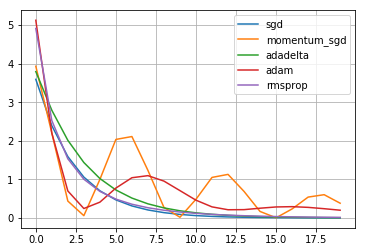

In [53]:
loss_dict = {}
loss_dict["sgd"] = []
loss_dict["momentum_sgd"] = []
loss_dict["adadelta"] = []
loss_dict["adam"] = []
loss_dict["rmsprop"] = []

for key, value in loss_dict.items():
    loss_dict[key] = main(key)
    
plt.figure()
plt.plot(loss_dict["sgd"], label = "sgd")
plt.plot(loss_dict["momentum_sgd"], label = "momentum_sgd")
plt.plot(loss_dict["adadelta"], label = "adadelta")
plt.plot(loss_dict["adam"], label = "adam")
plt.plot(loss_dict["rmsprop"], label = "rmsprop")
plt.legend()
plt.grid()